# Implement possibilistic k-means

Goal:

    Implement the mahalanobis_distance function.
    Implement the mahalanobis_distance function.
    Implement the calculate_u.

Hint: the assignation matrix should not be set to zeros at the beginning.


In [2]:
import random
import math
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [3]:
aMatrix = np.random.rand(4,2)
bMatrix = np.random.rand(4,2)

In [4]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

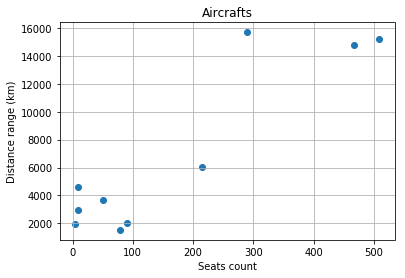

In [5]:
x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [8]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [9]:
data_set=X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.01
m = 2.0

assignation=np.zeros((len(X),groups))

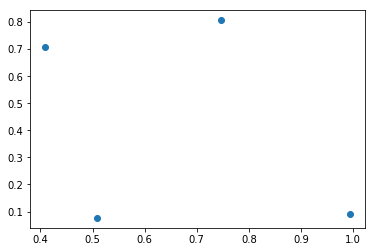

In [10]:
plt.plot(aMatrix[:,0], bMatrix[:,0], 'o')

In [11]:
import scipy.linalg as lg

class MahalanobisDistance:

    def set_dataset(self, dataset):
        self.dataset = dataset    

    def get_distance(self, x, v, feature_matrix):
        matrix_A = self.get_inverse_covariance_matrix(feature_matrix)
        result = np.subtract(x, v)
        return np.dot(np.dot(result, matrix_A), result)    
    
    def get_inverse_covariance_matrix(self,feature_matrix):
        print(feature_matrix)
        means_vector=np.mean(feature_matrix,axis=0)
        sum=np.zeros((2,2))
        for i in range(len(feature_matrix)):
            a=np.subtract(feature_matrix[i],means_vector)
            sum=np.add(sum,np.outer(a,a))
        return lg.inv(np.divide(sum,len(feature_matrix)))

In [12]:
mahalanobis_distance = MahalanobisDistance()
mahalanobis_distance.set_dataset(data_set)

In [13]:
def calculate_mah_distance(x1, x2, feature_matrix):
    global mahalanobis_distance
    return mahalanobis_distance.get_distance(x1, x2, feature_matrix)

In [40]:
def covariance_uv(u,v):
    return np.cov(u, v, rowvar=0)

In [41]:
covariance_uv(aMatrix, bMatrix)

array([[ 0.0137478 , -0.01692178, -0.0033349 ,  0.00168264],
       [-0.01692178,  0.04451522, -0.0193102 , -0.00845478],
       [-0.0033349 , -0.0193102 ,  0.03644015, -0.01577871],
       [ 0.00168264, -0.00845478, -0.01577871,  0.0395778 ]])

In [42]:
def mean_uv(u, v):
    uv_mean = np.mean(u), np.mean(v)
    return uv_mean

In [43]:
mean_uv(aMatrix, bMatrix)

(0.4127337673893918, 0.5910662239846161)

In [53]:
centers = []

def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups-1:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1]),
                        random.uniform(space[0][1],space[1][1])))
        iter=iter+1
        
select_centers()

In [54]:
print(centers)

[(0.2781777157037736, 0.8387978812945825, 1.0)]


In [55]:
def distance_uv(u, v, ax=1):
    return np.linalg.norm(u-v, axis=ax)

# //vectors
def calculate_distance(u,v):
    return math.sqrt((u[0]-v[0])**2+(u[1]-v[1])**2)

In [56]:
def calculate_u(x, i):
    global centers
    if calculate_distance(x, centers[0]) < calculate_distance(x, centers[1]):
        return [1,0]
    else:
        return [0,1]
    

In [14]:
def calculate_new_centers(u):
    global centers
    global groups
    global data_set
    global m
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(groups)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

In [58]:
def calculate_differences(new_assignation):
    global assignation    
    return np.sum(np.abs(np.subtract(assignation,new_assignation)))

In [16]:
def calculate_u_fcm(x,i):
    global centers
    if i == 0:
        sum=1.0+(calculate_distance(x, centers[0])/calculate_distance(x, centers[1]))**2
    else:
        sum=1.0+(calculate_distance(x, centers[1])/calculate_distance(x, centers[0]))**2
    return sum**-1

In [15]:
def calculate_eta(x,i):
    global data_set
    global centers
    global assignation
    eta_scalar_top = 0.0
    eta_scalar_bottom = 0.0
    mah_distance = calculate_mah_distance(x,centers[i],data_set)
    for k in range(len(data_set)):
        eta_scalar_bottom = eta_scalar_bottom + (assignation[k][i]**m)
        eta_scalar_top = eta_scalar_top + mah_distance * assignation[k][i]
    return eta_scalar_top*1.0/eta_scalar_bottom*1.0

In [17]:
def calculate_u_pcm(x,i):
    global data_set
    global centers
    eta = calculate_eta(x,i)
    if i == 0:
        sum=1.0+((calculate_mah_distance(x, centers[0],data_set))**2)/eta
    else:
        sum=1.0+((calculate_mah_distance(x, centers[1],data_set))**2)/eta
    return sum**-1

In [59]:
def cluster():
    global assignation    
    global error_margin
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation.append(calculate_u(data_set[i], iter))
        calculate_new_centers(new_assignation)
        if iter>0:
            if calculate_differences(new_assignation) < error_margin:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [45]:
def MahalanobisDistance(u, v):
    covariance_uv = np.cov(u,v, rowvar = 0)
    inv_covariance_uv = np.linalg.norm(covariance_uv)
    uv_mean = np.mean(u), np.mean(v)
    u_diff = np.array([u_i - uv_mean[0] for u_i in u])
    v_diff = np.array([v_i - uv_mean[0] for v_i in v])
    diff_uv = np.transpose([u_diff, v_diff])
    
    md = []
    for i in range(len(diff_uv)):
        md.append(np.sqrt(np.dot(np.dot(np.transpose(diff_uv[i]), inv_covariance_uv), diff_uv[i])))
    return md

In [48]:
MahalanobisDistance(aMatrix, bMatrix)

[array([[0.31554445, 0.23127216],
        [0.23127216, 0.42130595]]), array([[0.36864155, 0.15504821],
        [0.15504821, 0.18169393]])]

Second implementation

In [6]:
def mahalanobis_distance_2(u,v,VI):
    u = _validate_vector(u)
    v = _validate_vector(v)
    VI = np.atleast_2d(VI)
    delta = u - v 
    m = np.dot(np.dot(delta, VI), delta)
    return np.sqrt(m)

In [7]:
def mahalanobis_distance_not_squared_2(u,v,VI):
    u = _validate_vector(u)
    v = _validate_vector(v)
    VI = np.atleast_2d(VI)
    delta = u - v 
    m = np.dot(np.dot(delta, VI), delta)
    return m

In [8]:
def calculate_eta(u,v):
    inversed_v = inv(v)
    sum = (1.0 + (assignation) **2*mahalanobis_distance_not_squared(u,v,inversed_v)) / (1.0 + (assignation) **2)
    return sum

In [9]:
def calculate_u1(u,v):
    inversed_v = inv(v)
    distance = mahalanobis_distance(u, v, inversed_v)
    result = 1.0 + (mahalanobis_distance(u,v, inversed_v) / calculate_eta(u,v)) ** 2
    return result ** -1